In [1]:
pip install pyshp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.2 MB/s 


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import shapefile as shp

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Basic plots

In [4]:
loc_df = pd.read_csv('/content/drive/MyDrive/Data Science in Practice/Data and input tool/Processed Data/interviews_processed_3.csv')

In [5]:
loc_df.info()
for c in loc_df.columns:
  print(c + ": "+ str(loc_df[c].isna().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 22 columns):
 #   Column                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                      --------------  -----  
 0   Unnamed: 0                                                                                                                                  125 non-null    int64  
 1   place (country)                                                                                                                             124 non-null    object 
 2   place (city)                                                                                                                                124 non-null    object 
 3   latitude  degrees                            

In [ ]:
loc_df1=pd.read_csv('/content/drive/MyDrive/Data Science in Practice/Data and input tool/Processed Data/interviews_processed_altered.csv')

In [ ]:
loc_df1['place (country)']=loc_df1['place (country)'].replace(['1','2','3','4'],['Libya','Niger','Tunisia','Malta'])

In [ ]:
loc_df1

,Unnamed: 0,Number of interview,Number of interviewee,How many people interviewe,interviewee (migrant/source person),"precision migrant (migrants, asylum seeker, refugee)","precision source person (Autorities, NGO, expert, other)",precision source person,place (country),place (city),...,helped_by_citizens,helped_by_UNCHR,helped_by_conseil,helped_by_cellule,helped_by_other_organization,not_helped_by_organization,received_economical_help,received_sanitary_help,received_not_enough_help,received_no_help
0,0,1.1,1.0,1.0,1,3.0,NaN,NaN,1,Tripoli,...,0,0,0,0,0,1,0,0,0,0
1,1,2.1,2.0,1.0,2,NaN,2.0,researcher,2,Agadez,...,0,0,0,0,0,1,0,0,0,0
2,2,2.2,2.0,1.0,2,NaN,2.0,researcher,2,Agadez,...,0,0,0,0,0,1,0,0,0,0
3,3,3.1,3.0,1.0,1,3.0,NaN,NaN,2,Agadez,...,0,1,0,0,0,0,1,0,1,0
4,4,4.1,4.0,1.0,1,1.0,NaN,NaN,2,Agadez,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,169,111.1,111.0,1.0,1,3.0,NaN,NaN,2,Agadez,...,0,1,0,0,0,0,1,0,0,0
170,170,112.1,112.0,1.0,1,3.0,NaN,NaN,2,Agadez,...,0,1,0,0,0,0,1,0,0,0
171,171,113.1,113.0,1.0,2,NaN,4.0,smuggler,2,Agadez,...,0,0,0,0,0,1,0,0,0,0
172,172,12.2,12.0,1.0,2,NaN,3.0,UNHCR communication officer,3,Tunis,...,0,1,0,0,0,0,0,1,0,0


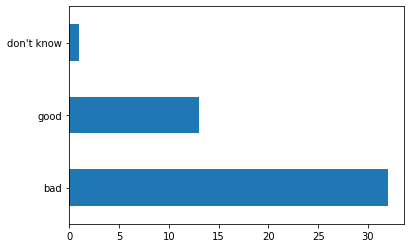

In [ ]:
loc_df['Access to healthcare (good/bad)'].value_counts().plot.barh()

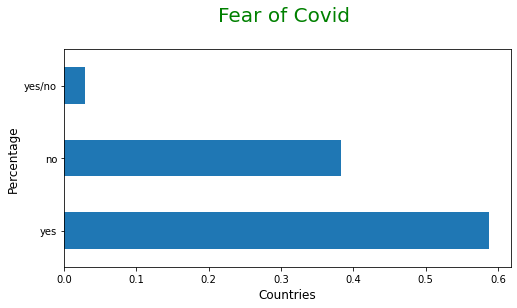

In [ ]:
plt.figure(figsize= (8,4))
loc_df['fear of Covid (yes/no)'].value_counts(normalize=True).plot.barh()
plt.title("Fear of Covid \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Countries", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

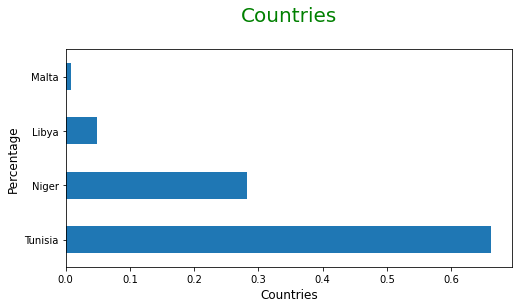

In [ ]:
plt.figure(figsize= (8,4))
loc_df['place (country)'].value_counts(normalize=True).plot.barh()
plt.title("Countries\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Countries", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()
#loc_df['place (country)'].value_counts().plot.bar() 

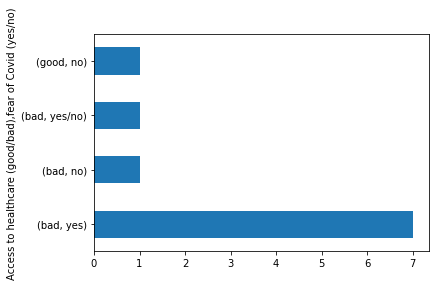

In [ ]:
loc_df.groupby('Access to healthcare (good/bad)')['fear of Covid (yes/no)'].value_counts().plot.barh()

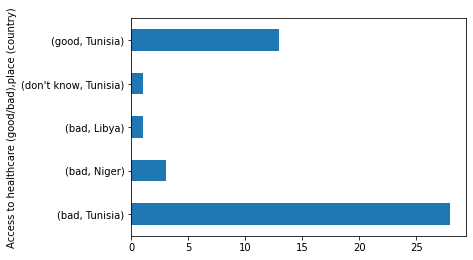

In [ ]:
loc_df.groupby('Access to healthcare (good/bad)')['place (country)'].value_counts().plot.barh()

# New plots

In [ ]:
l=loc_df['Name of NGO or other who helped'].tolist()
print(l)

[nan, nan, nan, nan, 'Red Cross', nan, nan, nan, nan, nan, nan, 'State', 'State', 'UNHCR', 'UNHCR', 'UNHCR', nan, nan, nan, nan, 'Cellule de solidarite africaine', nan, nan, nan, nan, 'IOM', nan, 'IOM', 'citizens', nan, 'IOM', 'IOM', nan, nan, 'citizens', 'citizens', nan, nan, nan, nan, nan, nan, nan, 'IOM', 'IOM', 'UNHCR', 'UNHCR', 'IOM', nan, nan, nan, 'UNHCR', nan, nan, nan, 'IOM', nan, nan, 'UNHCR', 'UNHCR', 'UNHCR', nan, nan, 'IOM', 'unknown', 'Cellule de solidatit afrricaine', 'Cellule de solidatit afrricaine', 'Cellule de solidatit afrricaine', nan, nan, nan, nan, 'Conseil Tunisien pour les Refugis', 'UNHCR', 'Conseil Tunisien pour les Refugis', nan, nan, 'Conseil Tunisien pour les Refugis', nan, nan, 'Conseil Tunisien pour les Refugis', 'Conseil Tunisien pour les Refugis', nan, nan, 'Baraa', 'Municipality', 'Municipality', 'Caritas', 'Caritas', 'Espace amis des jeunes', 'Red Crescent', "Entraide et Avenir d'Afrrique", 'Students', 'Students', 'UNHCR', 'Conseil Tunisien pour les 

In [ ]:
loc_df['Name of NGO or other who helped']=loc_df['Name of NGO or other who helped'].replace(['Cellule de solidarite africaine','Conseil Tunisien pour les R\x82fugi\x82s','Conseil Tunisien pour les r\x82fugi\x82s','Cellule de solidarit\x82 africaine','Medecins sans fronti\x8ares','Conseil Tunisien pour les R\x82fugi\x82s','citizens','citizen'],['Cellule de solidatit afrricaine','Conseil Tunisien pour les Refugis','Conseil Tunisien pour les Refugis','Cellule de solidarite africaine','Medecins sans frontiares','Conseil Tunisien pour les Refugis','citizens','citizens'])

In [ ]:
loc_df['Name of NGO who helped 2']=loc_df['Name of NGO who helped 2'].replace(['Cellule de solidatit\x82 afrricaine','Conseil Tunisien pour les R\x82fugi\x82s','Conseil Tunisien pour les r\x82fugi\x82s','Cellule de solidarit\x82 africaine','Medecins sans fronti\x8ares','Conseil Tunisien pour les R\x82fugi\x82s'],['Cellule de solidatit afrricaine','Conseil Tunisien pour les Refugis','Conseil Tunisien pour les Refugis','Cellule de solidarite africaine','Medecins sans frontiares','Conseil Tunisien pour les Refugis'])

In [ ]:
loc_df['Name of NGO or other who helped']=loc_df['Name of NGO or other who helped'].replace(['Cellule de solidatit\x82 afrricaine'],['Cellule de solidarite africaine'])

In [ ]:
loc_df['Name of NGO or other who helped']=loc_df['Name of NGO or other who helped'].replace(['Cellule de solidatit afrricaine'],['Cellule de solidarite africaine'])

In [ ]:
#tun
Tun_df=loc_df[loc_df["place (country)"].str.contains('Tunisia',na=False) ]

#Tun_df1=loc_df1[loc_df1["place (country)"].int.contains('3',na=False) ]
# Tun_df['Access to healthcare (good/bad)'].value_counts().plot.barh()

In [ ]:
Tun_df.groupby(['Access to healthcare (good/bad)','fear of Covid (yes/no)']).size()

Access to healthcare (good/bad)  fear of Covid (yes/no)
bad                              yes                       6
                                 yes/no                    1
good                             no                        1
dtype: int64

In [ ]:
Tun_df.groupby(['Access to healthcare (good/bad)','Ill (yes/no)']).size()

Access to healthcare (good/bad)  Ill (yes/no)
bad                              No              23
                                 Yes              3
                                 Yes              1
                                 yes              1
don't know                       No               1
good                             No              13
dtype: int64

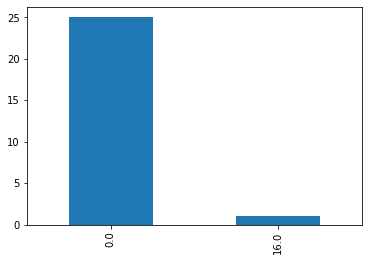

In [ ]:
Tun_df.iloc[:, 11].value_counts().plot.bar()#How many people known with Covid-19 symptom, basically this graph shows that in tunaisa mostv citties have no covid symptom whereas only 1 city has 16 people with covid syms

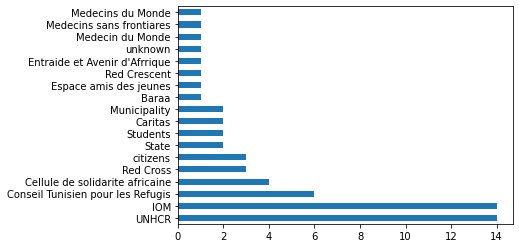

In [ ]:
loc_df['Name of NGO or other who helped'].value_counts().plot.barh()

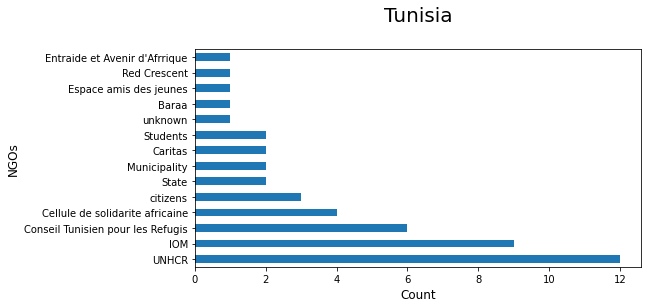

In [ ]:




plt.figure(figsize= (8,4))
Tun_df['Name of NGO or other who helped'].value_counts().plot.barh()

plt.title("Tunisia\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})
plt.xlabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("NGOs", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


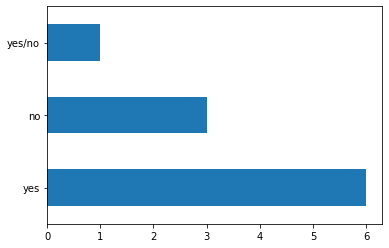

In [ ]:
Tun_df['fear of Covid (yes/no)']=Tun_df['fear of Covid (yes/no)'].replace(['no','No'],['no','no']) 
Tun_df['fear of Covid (yes/no)'].value_counts().plot.barh()

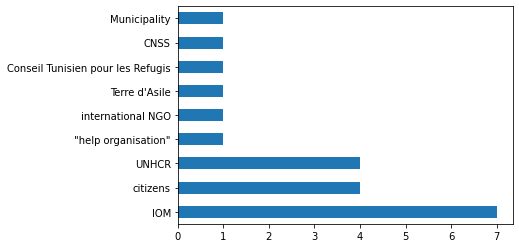

In [ ]:
Tun_df['Name of NGO who helped 2'].value_counts().plot.barh()

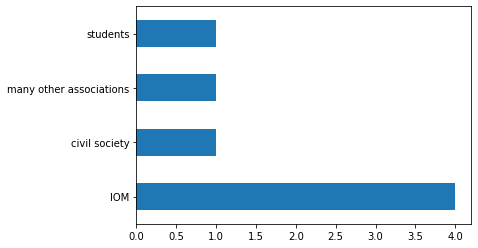

In [ ]:
Tun_df['Name of NGO who helped 3'].value_counts().plot.barh()

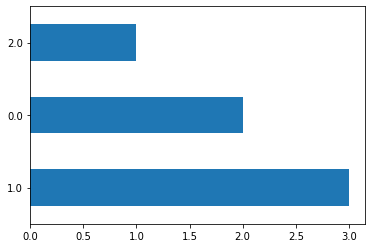

In [ ]:
Tun_df["How many people known who couldn't access to hospital because of Covid"].value_counts().plot.barh()


In [ ]:
nig_df['Name of NGO or other who helped'].tolist()
print(l)

[nan, nan, nan, nan, 'Red Cross', nan, nan, nan, nan, nan, nan, 'State', 'citizens', 'UNHCR', 'UNHCR', 'UNHCR', nan, nan, nan, nan, 'Cellule de solidatit afrricaine', nan, nan, nan, nan, 'IOM', nan, 'IOM', 'citizen', nan, 'IOM', 'IOM', nan, nan, 'citizen', 'citizens', nan, nan, nan, nan, 'citizens', nan, 'citizens', 'IOM', 'IOM', 'UNHCR', 'UNHCR', 'IOM', nan, nan, nan, 'UNHCR', nan, nan, nan, 'IOM', nan, nan, 'UNHCR', 'UNHCR', 'UNHCR', nan, nan, 'IOM', 'unknown', 'Cellule de solidarite africaine', 'Cellule de solidarite africaine', 'Cellule de solidarite africaine', nan, nan, nan, nan, 'Conseil Tunisien pour les Refugis', 'UNHCR', 'Conseil Tunisien pour les Refugis', nan, nan, 'Conseil Tunisien pour les Refugis', nan, 'citizens', 'Conseil Tunisien pour les Refugis', 'Conseil Tunisien pour les Refugis', nan, nan, 'Baraa', 'Municipality', 'Municipality', 'Caritas', 'Caritas', 'Espace amis des jeunes', 'Red Crescent', "Entraide et Avenir d'Afrrique", 'Students', 'citizens', 'UNHCR', 'Cons

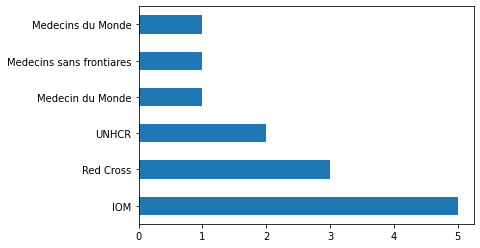

In [ ]:
#niger
nig_df=loc_df[loc_df["place (country)"].str.contains('Niger',na=False) ]

nig_df['Name of NGO or other who helped'].value_counts().plot.barh()

In [ ]:
nig_df.groupby(['Access to healthcare (good/bad)','fear of Covid (yes/no)']).size()

Access to healthcare (good/bad)  fear of Covid (yes/no)
bad                              yes                       1
dtype: int64

In [ ]:
nig_df.groupby(['Access to healthcare (good/bad)','Ill (yes/no)']).size()

Access to healthcare (good/bad)  Ill (yes/no)
bad                              No              1
                                 Yes             1
dtype: int64

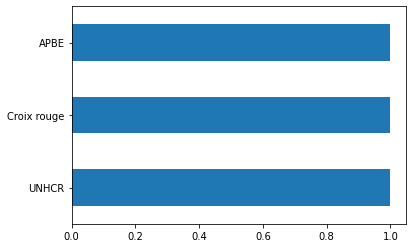

In [ ]:
nig_df['Name of NGO who helped 2'].value_counts().plot.barh()

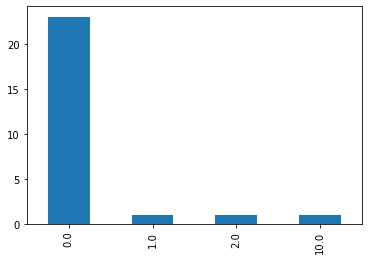

In [ ]:
nig_df.iloc[:, 11].value_counts().plot.bar()#How many people known with Covid-19 symptom, basically this graph shows that in niger mostv citties have no covid symptom whereas only 3 cities have 1,2 and 10 people with covid syms

In [ ]:
lib_df=loc_df[loc_df["place (country)"].str.contains('Libya',na=False) ]



In [ ]:
lib_df.groupby(['Access to healthcare (good/bad)','fear of Covid (yes/no)']).size()

Access to healthcare (good/bad)  fear of Covid (yes/no)
bad                              no                        1
dtype: int64

In [ ]:
lib_df.groupby(['Access to healthcare (good/bad)','Ill (yes/no)']).size()

Access to healthcare (good/bad)  Ill (yes/no)
bad                              Yes             1
dtype: int64

In [ ]:
new_df = pd.read_csv('/content/drive/MyDrive/Data Science in Practice/Data and input tool/Processed Data/interviews_processed_3.csv')

In [ ]:
new_df.columns

Index(['Unnamed: 0', 'place (country)', 'place (city)', 'latitude  degrees',
       'latitude minutes', 'latitude seconds', 'latitude direction',
       'longitude degrees', 'longitude minutes', 'longitude seconds',
       'longitude direction', 'Ill (yes/no)',
       'How many  people known with Covid-19 symptoms ',
       'How many people known who couldn't access to hospital because of Covid',
       'Access to healthcare (good/bad)', 'fear of Covid (yes/no)',
       'received help  (yes economical, yes sanitary, yes but not enough, no)',
       'received help  (yes economical, yes sanitary, yes but not enough, no).1',
       'Name of NGO or other who helped', 'Name of NGO who helped 2',
       'Name of NGO who helped 3',
       'reported having left after the interview (no, yes to Libya, yes to Europe, tried to cross the sea but didn't succeed, yes to another city)'],
      dtype='object')

In [ ]:
new_df.groupby(['Access to healthcare (good/bad)','fear of Covid (yes/no)']).size()

Access to healthcare (good/bad)  fear of Covid (yes/no)                      
bad                              no                                              1
                                 yes                                             7
                                 yes /  no (one says yes, second one says no)    1
good                             no                                              1
dtype: int64

In [ ]:
new_df.groupby(['Access to healthcare (good/bad)','Ill (yes/no)']).size()

Access to healthcare (good/bad)  Ill (yes/no)
bad                              No              24
                                 Yes              5
                                 Yes              1
                                 yes              1
don't know                       No               1
good                             No              13
dtype: int64

## Plots with errors

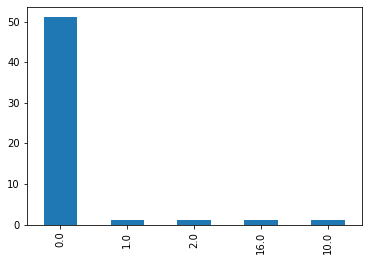

In [ ]:
loc_df.iloc[:, 11].value_counts().plot.bar()#How many people known with Covid-19 symptom, basically this graph shows that in  most countries which 50  have no covid symptom whereas only 1 city eahc has 16,1 people with covid syms



## Working Bar plots

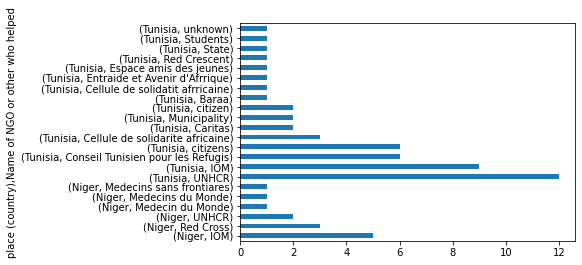

In [ ]:
loc_df.groupby("place (country)")['Name of NGO or other who helped'].value_counts().plot.barh()

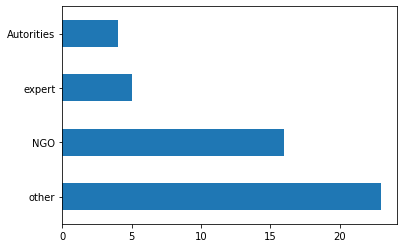

In [ ]:
new_df['precision source person (Autorities, NGO, expert, other)'].value_counts().plot.barh() #1 authorities 2 -expert 3-ngo 4-ong 5-others

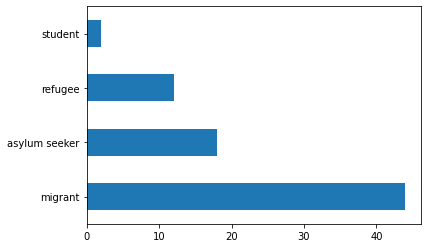

In [ ]:
new_df["precision migrant (migrants, asylum seeker, refugee)"].value_counts().plot.barh() #1-migrant 2-student 3 aslyum seeker 4- refugee

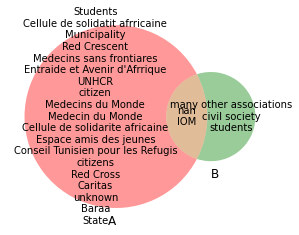

In [ ]:
set1 = set(loc_df['Name of NGO or other who helped'])
set2 = set(loc_df['Name of NGO who helped 3'])

venn = venn2([set1, set2])
venn.get_label_by_id('100').set_text('\n'.join(map(str,set1-set2)))
venn.get_label_by_id('110').set_text('\n'.join(map(str,set1&set2)))
venn.get_label_by_id('010').set_text('\n'.join(map(str,set2-set1)))

# Hielke Experimentation

In [6]:
altered_df = pd.read_csv('/content/drive/MyDrive/Data Science in Practice/Data and input tool/Processed Data/interviews_processed_altered.csv')

## Interviewee plots

In [ ]:
new_df.groupby('interviewee (migrant/source person)')['Ill (yes/no)'].value_counts().plot.bar()

KeyError: ignored

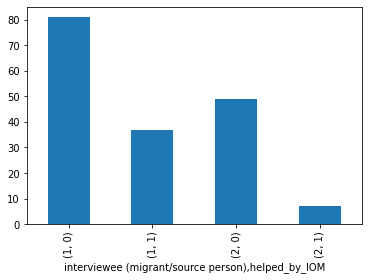

In [ ]:
altered_df.groupby('interviewee (migrant/source person)')['helped_by_IOM'].value_counts().plot.bar()

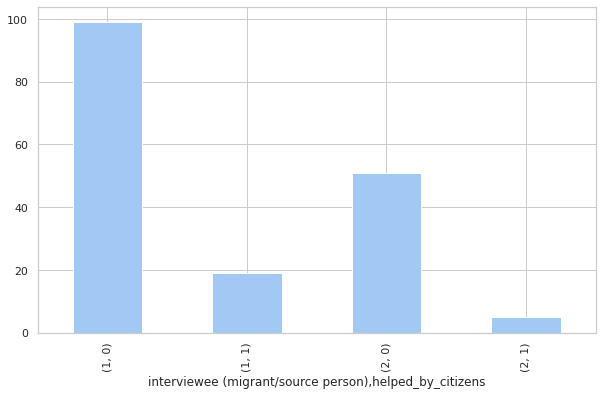

In [ ]:
altered_df.groupby('interviewee (migrant/source person)')['helped_by_citizens'].value_counts().plot.bar()

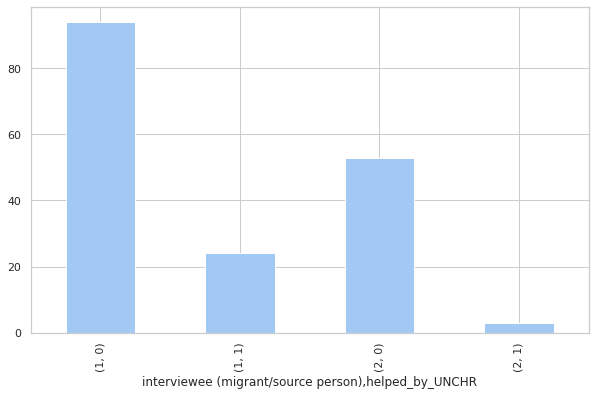

In [ ]:
altered_df.groupby('interviewee (migrant/source person)')['helped_by_UNCHR'].value_counts().plot.bar()

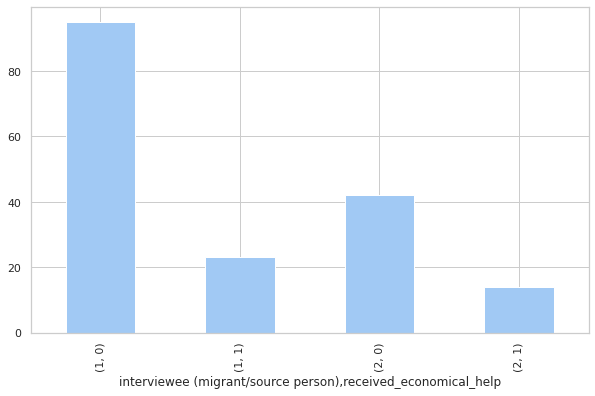

In [ ]:
altered_df.groupby('interviewee (migrant/source person)')['received_economical_help'].value_counts().plot.bar()

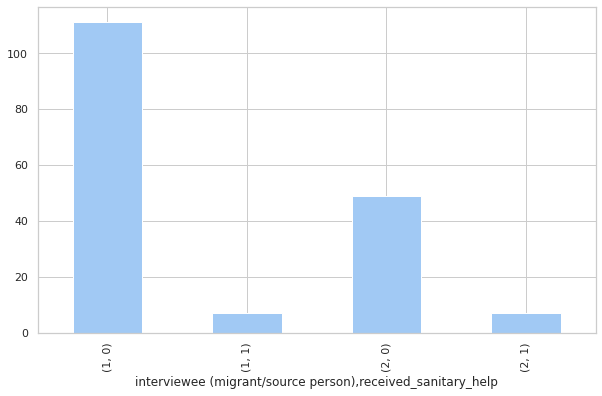

In [ ]:
altered_df.groupby('interviewee (migrant/source person)')['received_sanitary_help'].value_counts().plot.bar()

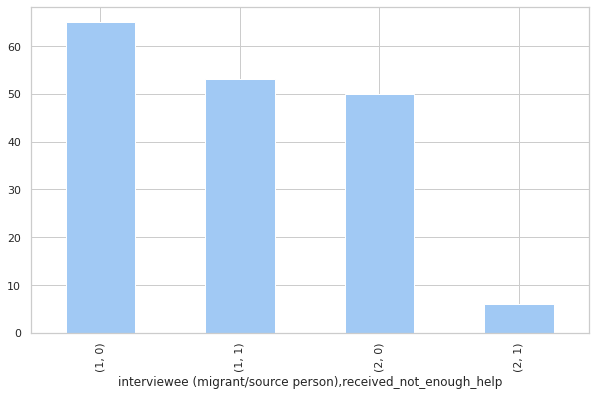

In [ ]:
altered_df.groupby('interviewee (migrant/source person)')['received_not_enough_help'].value_counts().plot.bar()

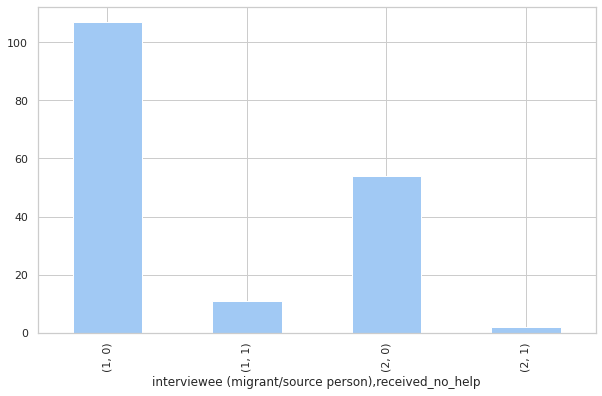

In [ ]:
altered_df.groupby('interviewee (migrant/source person)')['received_no_help'].value_counts().plot.bar()

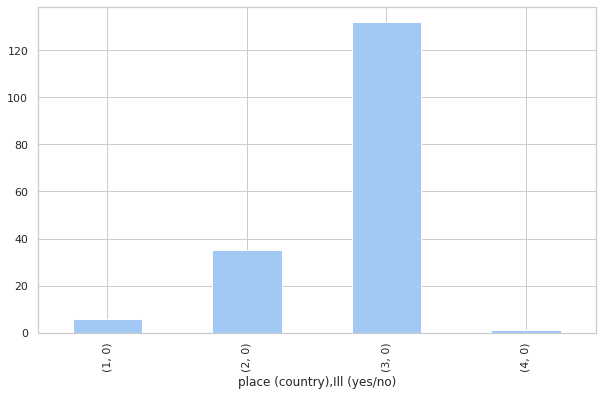

In [ ]:
altered_df.groupby('place (country)')['Ill (yes/no)'].value_counts().plot.bar()

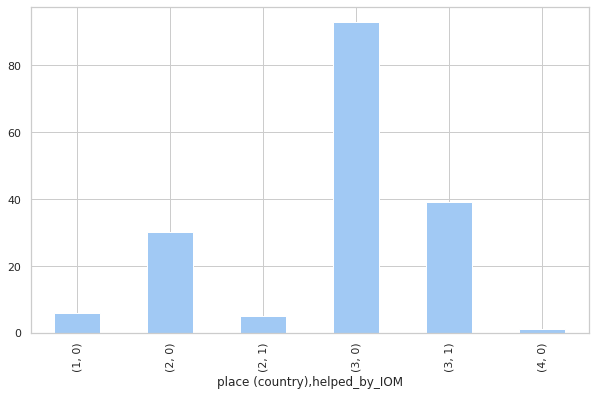

In [ ]:
altered_df.groupby('place (country)')['helped_by_IOM'].value_counts().plot.bar()

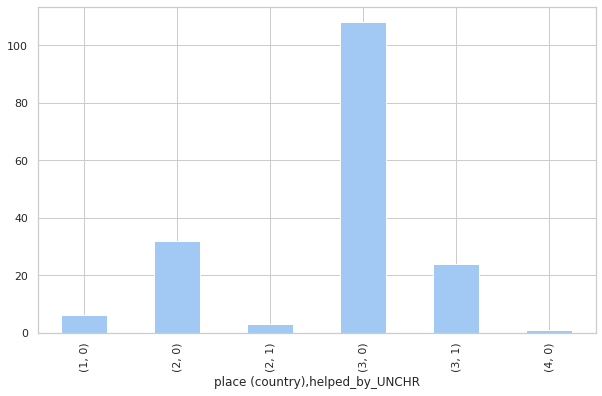

In [ ]:
altered_df.groupby('place (country)')['helped_by_UNCHR'].value_counts().plot.bar()

## Received help (migrant/no migrant)

In [18]:
altered_df["interviewee (migrant/source person)"] = altered_df["interviewee (migrant/source person)"].replace(1, 'migrant')

In [19]:
altered_df

,Unnamed: 0,Number of interview,Number of interviewee,How many people interviewe,interviewee (migrant/source person),"precision migrant (migrants, asylum seeker, refugee)","precision source person (Autorities, NGO, expert, other)",precision source person,place (country),place (city),...,helped_by_UNCHR,helped_by_conseil,helped_by_cellule,helped_by_other_organization,not_helped_by_organization,received_economical_help,received_sanitary_help,received_not_enough_help,received_no_help,"""interviewee (migrant/source person)"""
0,0,1.1,1.0,1.0,migrant,3.0,NaN,NaN,1,Tripoli,...,0,0,0,0,1,0,0,0,0,1
1,1,2.1,2.0,1.0,source person,NaN,2.0,researcher,2,Agadez,...,0,0,0,0,1,0,0,0,0,2
2,2,2.2,2.0,1.0,source person,NaN,2.0,researcher,2,Agadez,...,0,0,0,0,1,0,0,0,0,2
3,3,3.1,3.0,1.0,migrant,3.0,NaN,NaN,2,Agadez,...,1,0,0,0,0,1,0,1,0,1
4,4,4.1,4.0,1.0,migrant,1.0,NaN,NaN,2,Agadez,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,169,111.1,111.0,1.0,migrant,3.0,NaN,NaN,2,Agadez,...,1,0,0,0,0,1,0,0,0,1
170,170,112.1,112.0,1.0,migrant,3.0,NaN,NaN,2,Agadez,...,1,0,0,0,0,1,0,0,0,1
171,171,113.1,113.0,1.0,source person,NaN,4.0,smuggler,2,Agadez,...,0,0,0,0,1,0,0,0,0,2
172,172,12.2,12.0,1.0,source person,NaN,3.0,UNHCR communication officer,3,Tunis,...,1,0,0,0,0,0,1,0,0,2


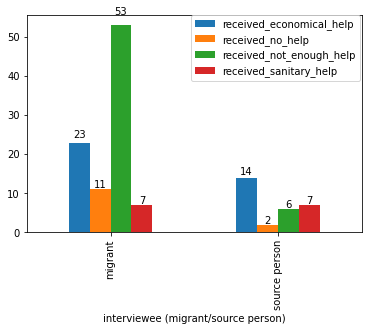

In [20]:
pivoted = altered_df[["interviewee (migrant/source person)", "received_economical_help", "received_sanitary_help", "received_not_enough_help", "received_no_help"]].pivot_table(index="interviewee (migrant/source person)", aggfunc=np.sum, fill_value=0)
plot = pivoted.plot.bar()
plot.legend(bbox_to_anchor=(1.01, 1.025))

for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0: 
        plot.annotate(f'{height}', (x + width/2, y + height*1.05), ha='center')

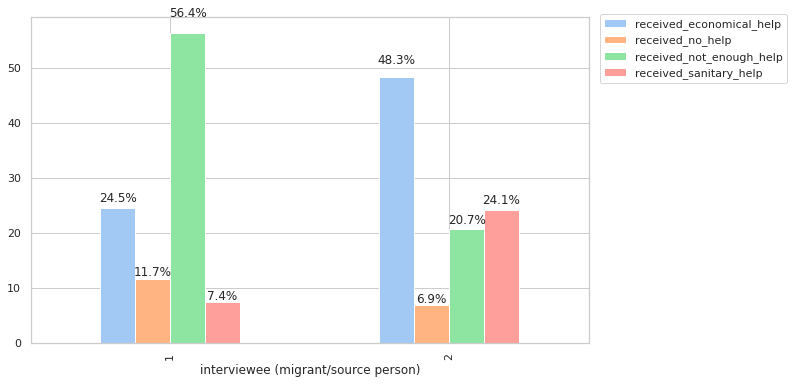

In [ ]:
pivoted = altered_df[["interviewee (migrant/source person)", "received_economical_help", "received_sanitary_help", "received_not_enough_help", "received_no_help"]].pivot_table(index="interviewee (migrant/source person)", aggfunc=np.sum, fill_value=0)
pivoted_percentages = pivoted.div(pivoted.sum(axis=1), axis=0).multiply(100)
plot = pivoted_percentages.plot.bar()
plot.legend(bbox_to_anchor=(1.01, 1.025))

for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0: 
        plot.annotate(f'{height:.1f}' + '%', (x + width/2, y + height*1.05), ha='center')

## Received help by country

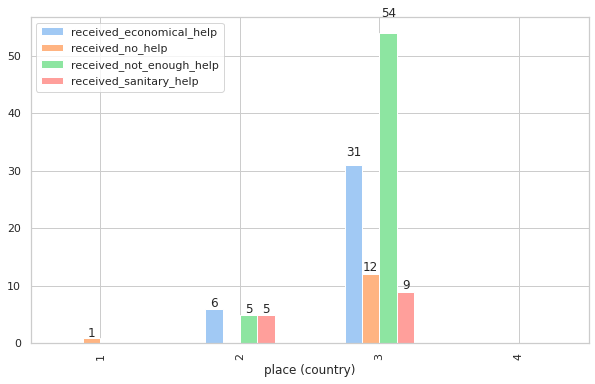

In [ ]:
pivoted = altered_df[["place (country)", "received_economical_help", "received_sanitary_help", "received_not_enough_help", "received_no_help"]].pivot_table(index="place (country)", aggfunc=np.sum, fill_value=0)
plot = pivoted.plot.bar()

for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0: 
        plot.annotate(f'{height}', (x + width/2, y + height*1.05), ha='center')

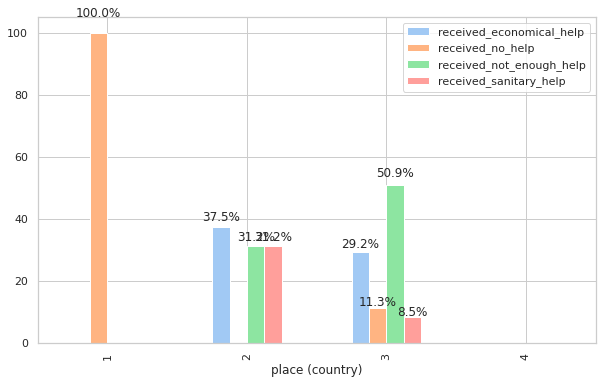

In [ ]:
pivoted = altered_df[["place (country)", "received_economical_help", "received_sanitary_help", "received_not_enough_help", "received_no_help"]].pivot_table(index="place (country)", aggfunc=np.sum, fill_value=0)
pivoted_percentages = pivoted.div(pivoted.sum(axis=1), axis=0).multiply(100)
plot = pivoted_percentages.plot.bar()

for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0: 
        plot.annotate(f'{height:.1f}' + '%', (x + width/2, y + height*1.05), ha='center')

## Organization that helped (migrant/non migrant)

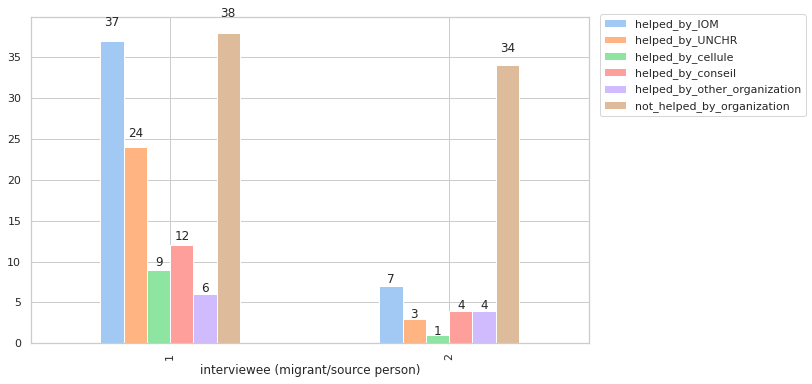

In [ ]:
pivoted = altered_df[["interviewee (migrant/source person)", "helped_by_IOM", "helped_by_UNCHR", "helped_by_conseil", "helped_by_cellule", "helped_by_other_organization", "not_helped_by_organization"]].pivot_table(index="interviewee (migrant/source person)", aggfunc=np.sum, fill_value=0)
plot = pivoted.plot.bar()
plot.legend(bbox_to_anchor=(1.01, 1.025))

for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0: 
        plot.annotate(f'{height}', (x + width/2, y + height*1.05), ha='center')

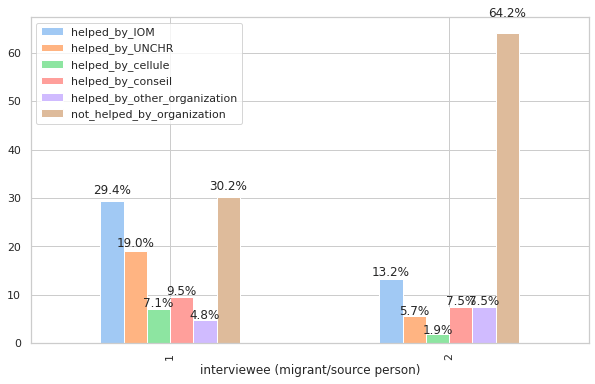

In [ ]:
pivoted = altered_df[["interviewee (migrant/source person)", "helped_by_IOM", "helped_by_UNCHR", "helped_by_conseil", "helped_by_cellule", "helped_by_other_organization", "not_helped_by_organization"]].pivot_table(index="interviewee (migrant/source person)", aggfunc=np.sum, fill_value=0)
pivoted_percentages = pivoted.div(pivoted.sum(axis=1), axis=0).multiply(100)
plot = pivoted_percentages.plot.bar()

for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0: 
        plot.annotate(f'{height:.1f}' + '%', (x + width/2, y + height*1.05), ha='center')

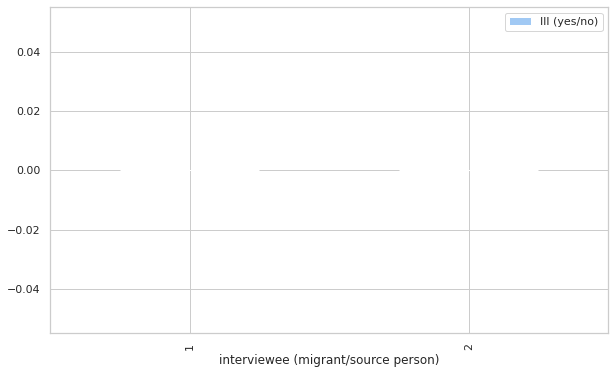

In [ ]:
pivoted = altered_df[["interviewee (migrant/source person)", "Ill (yes/no)"]].pivot_table(index="interviewee (migrant/source person)", aggfunc=np.sum, fill_value=0)
pivoted.plot.bar()

## Organization that helped by country

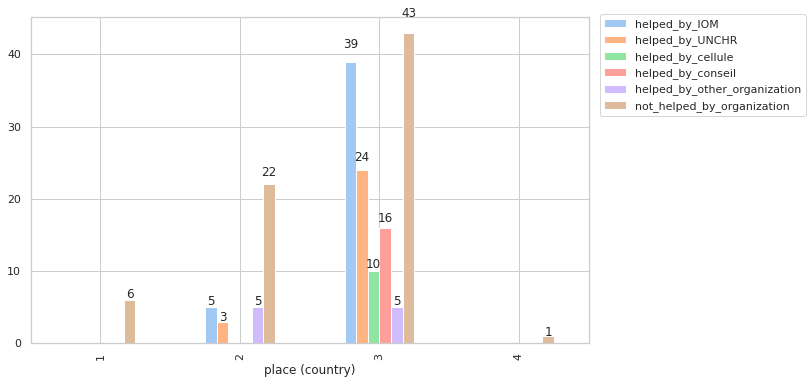

In [ ]:
pivoted = altered_df[["place (country)", "helped_by_IOM", "helped_by_UNCHR", "helped_by_conseil", "helped_by_cellule", "helped_by_other_organization", "not_helped_by_organization"]].pivot_table(index="place (country)", aggfunc=np.sum, fill_value=0)
plot = pivoted.plot.bar()
plot.legend(bbox_to_anchor=(1.01, 1.025))

for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0: 
        plot.annotate(f'{height}', (x + width/2, y + height*1.05), ha='center')

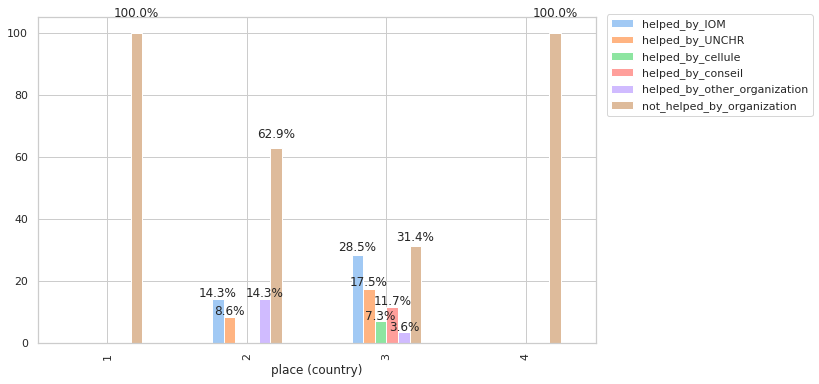

In [ ]:
pivoted = altered_df[["place (country)", "helped_by_IOM", "helped_by_UNCHR", "helped_by_conseil", "helped_by_cellule", "helped_by_other_organization", "not_helped_by_organization"]].pivot_table(index="place (country)", aggfunc=np.sum, fill_value=0)
pivoted_percentages = pivoted.div(pivoted.sum(axis=1), axis=0).multiply(100)
plot = pivoted_percentages.plot.bar()
plot.legend(bbox_to_anchor=(1.01, 1.025))

for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0: 
        plot.annotate(f'{height:.1f}' + '%', (x + width/2, y + height*1.05), ha='center')
